In [1]:
# CRISP-DM Data Understanding, Data Cleaning and Preprocessing
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
complaints_df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

complaints_df.info()

/var/folders/7b/c18lkd_95v345lvvmts66_k40000gn/T/ipykernel_79199/2313785986.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints_df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914838 entries, 0 to 8914837
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         object 
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  int64  
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX          

In [2]:
# Data Preparation, Cleaning and Preprocessing
# Define columns to drop
columns_to_drop = ['CMPLNT_FR_DT', 'LAW_CAT_CD', 'CMPLNT_NUM', 'CMPLNT_TO_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_TM', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 
                   'JURIS_DESC', 'JURISDICTION_CODE', 'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'LOC_OF_OCCUR_DESC', 
                   'ADDR_PCT_CD', 'RPT_DT', 'BORO_NM', 'X_COORD_CD', 'Y_COORD_CD', 'TRANSIT_DISTRICT', 'Lat_Lon', 
                   'PATROL_BORO', 'STATION_NAME', 'KY_CD', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']

# Drop the columns
complaints_df = complaints_df.drop(columns=columns_to_drop)
complaints_df = complaints_df.dropna()

# Rows with ""(null)"" values that we can remove
# Define columns where (null) values need to be checked
columns_to_check = ['OFNS_DESC', 'PREM_TYP_DESC']

# Filter out rows where any of the specified columns contain '(null)'
complaints_df = complaints_df[~complaints_df[columns_to_check].isin(['(null)']).any(axis=1)]

In [3]:
complaints_df.head()

,OFNS_DESC,PREM_TYP_DESC,Latitude,Longitude
8,ROBBERY,BANK,40.741731,-73.989447
9,ARSON,RESIDENCE-HOUSE,40.689592,-73.940805
10,ARSON,RESIDENCE-HOUSE,40.676671,-73.931768
12,ROBBERY,STREET,40.850992,-73.827426
29,ROBBERY,BANK,40.707632,-74.011479


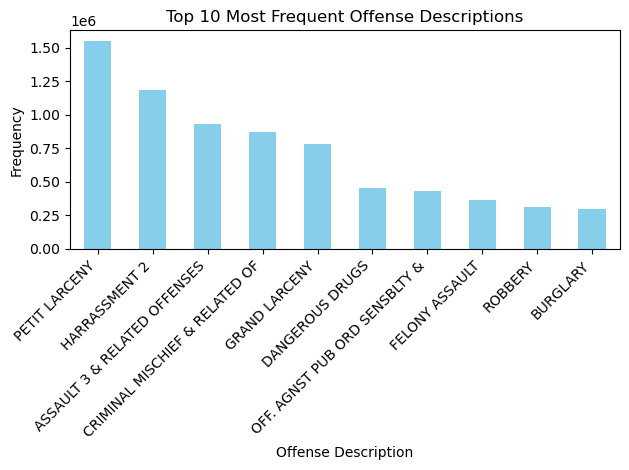

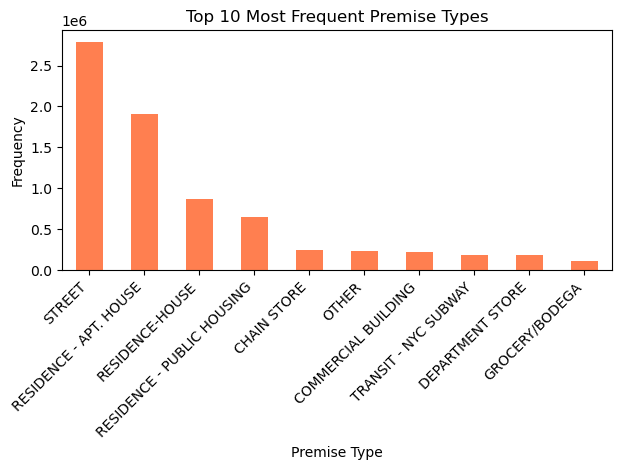

In [4]:
# Plotting top 10 most frequent Offense Descriptions
top_ofns_desc = complaints_df['OFNS_DESC'].value_counts().head(10)
top_ofns_desc.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Offense Descriptions')
plt.xlabel('Offense Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Improve label visibility by rotating them
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

# Plotting top 10 most frequent Premise Types
top_prem_typ_desc = complaints_df['PREM_TYP_DESC'].value_counts().head(10)
top_prem_typ_desc.plot(kind='bar', color='coral')
plt.title('Top 10 Most Frequent Premise Types')
plt.xlabel('Premise Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Improve label visibility by rotating them
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()
    

In [5]:
# Confirmatory Data Analysis
# hypothesis - no association between PREM_TYP_DESC and OFNS_DESC
# The Chi-Square statistic and p-value obtained suggest 
# a very strong association between the type of premises (PREM_TYP_DESC) and the type of offense (OFNS_DESC). 
# With a Chi-Square statistic of approximately 6547656.49 and a p-value of 0.0, 
# can confidently reject the null hypothesis that there is no association between these two variables. 
# This means there is statistically significant evidence to support that different types of 
# offenses occur with varying frequencies at different types of premises.

import pandas as pd
import scipy.stats as stats

cross_tab = pd.crosstab(complaints_df['PREM_TYP_DESC'], complaints_df['OFNS_DESC'])

chi2, p_value, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

Chi-Square Statistic: 13881876.854156408
P-value: 0.0


In [10]:
# the columns 'OFNS_DESC' and 'PREM_TYP_DESC' are critical categorical variables
# Stratified Sampling Strategy
# sample size specified for some of the strata cannot exceed the actual number of instances in those strata
# adjust the sampling fraction calculation to prevent exceeding the actual group size

def stratified_sample(df, strata_cols, sample_size):
    n = len(df)
    strata_size = df.groupby(strata_cols).size()
    strata_sample_size = sample_size * (strata_size / n)
    
    # After defining strata_sample_size
    print(strata_sample_size)

    # You can also check to ensure no values exceed the group counts
    print(strata_sample_size / strata_size)  # Should be <= 1 for all groups

    # Sampling from each stratum
    def sample_stratum(group):
        frac = min(strata_sample_size[group.name] / len(group), 1)  # Ensure frac does not exceed 1
        return group.sample(frac=frac, random_state=42)

    # Apply the sampling function
    sampled_df = df.groupby(strata_cols).apply(sample_stratum).reset_index(drop=True)
    return sampled_df

# Example usage with your DataFrame
complaints_df = stratified_sample(complaints_df, ['OFNS_DESC', 'PREM_TYP_DESC'], 1000000)


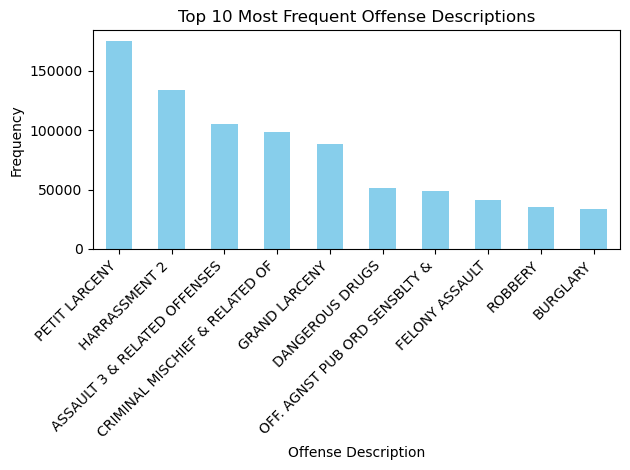

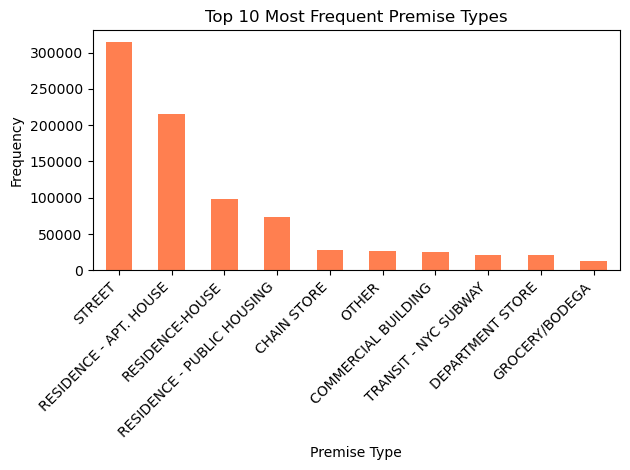

In [11]:
# Descriptive Statistics
# Plotting top 10 most frequent Offense Descriptions
top_ofns_desc = complaints_df['OFNS_DESC'].value_counts().head(10)
top_ofns_desc.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Offense Descriptions')
plt.xlabel('Offense Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Improve label visibility by rotating them
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

# Plotting top 10 most frequent Premise Types
top_prem_typ_desc = complaints_df['PREM_TYP_DESC'].value_counts().head(10)
top_prem_typ_desc.plot(kind='bar', color='coral')
plt.title('Top 10 Most Frequent Premise Types')
plt.xlabel('Premise Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Improve label visibility by rotating them
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

In [12]:
# Read the CSV file into a DataFrame
severity_df = pd.read_csv('offense_severity_scores.csv')

severity_dict = severity_df.set_index('Offense')['Severity_Score'].to_dict()
complaints_df['OFNS_DESC_Severity_Score'] = complaints_df['OFNS_DESC'].map(severity_dict)

# Map PREM_TYP_DESC to an Ecomonic Value 
economic_df = pd.read_csv('economic_values.csv')

# Convert DataFrame back to a dictionary
economic_values_dict = pd.Series(economic_df.Economic_Value.values, index=economic_df.Premise_Type).to_dict()

# Map the economic values to complaints_df
complaints_df['PREM_Economic_Value'] = complaints_df['PREM_TYP_DESC'].map(economic_values_dict)

# Print the updated DataFrame to verify
complaints_df.head()

,OFNS_DESC,PREM_TYP_DESC,Latitude,Longitude,OFNS_DESC_Severity_Score,PREM_Economic_Value
0,ADMINISTRATIVE CODE,AIRPORT TERMINAL,40.679701,-73.776047,2.0,10.0
1,ADMINISTRATIVE CODE,AIRPORT TERMINAL,40.679701,-73.776047,2.0,10.0
2,ADMINISTRATIVE CODE,AIRPORT TERMINAL,40.770313,-73.876024,2.0,10.0
3,ADMINISTRATIVE CODE,AIRPORT TERMINAL,40.756861,-73.875656,2.0,10.0
4,ADMINISTRATIVE CODE,ATM,40.715824,-73.986294,2.0,9.0


In [13]:
# Save the modified DataFrame

# Drop the columns
complaints_df = complaints_df.drop(columns=['OFNS_DESC', 'PREM_TYP_DESC'])
complaints_df = complaints_df.dropna()

complaints_df.to_csv('NYPD_cleaned_mapped.csv', index=False)

In [14]:
complaints_df.head()

,Latitude,Longitude,OFNS_DESC_Severity_Score,PREM_Economic_Value
0,40.679701,-73.776047,2.0,10.0
1,40.679701,-73.776047,2.0,10.0
2,40.770313,-73.876024,2.0,10.0
3,40.756861,-73.875656,2.0,10.0
4,40.715824,-73.986294,2.0,9.0


In [15]:
complaints_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 999875 entries, 0 to 999884
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Latitude                  999875 non-null  float64
 1   Longitude                 999875 non-null  float64
 2   OFNS_DESC_Severity_Score  999875 non-null  float64
 3   PREM_Economic_Value       999875 non-null  float64
dtypes: float64(4)
memory usage: 38.1 MB


In [16]:
import pandas as pd
from pymongo import MongoClient
from tqdm.notebook import tqdm  # Use the notebook version of tqdm for better integration

# Constants for MongoDB connection and geospatial calculations
MONGO_URI = 'mongodb://localhost:27017/'
DB_NAME = 'property_database'
COLLECTION_NAME = 'properties'
RADIUS_METERS = 2500

# Load your DataFrame (assuming complaints_df is already loaded)
# complaints_df = pd.read_csv('path_to_your_complaints_data.csv')

# Define the combined function
def add_property_price_data(row, mongo_uri=MONGO_URI, db_name=DB_NAME, collection_name=COLLECTION_NAME, radius_meters=RADIUS_METERS):
    """
    For a given row with latitude and longitude, calculate the average property metrics
    within a specified radius and return them as a series.

    Parameters:
    row (Series): A pandas DataFrame row containing 'Latitude' and 'Longitude'.
    mongo_uri (str): MongoDB URI.
    db_name (str): Name of the database.
    collection_name (str): Name of the collection.
    radius_meters (int): Radius in meters for the geospatial query.

    Returns:
    Series: Contains average property price, average price per bed, and average price per square foot.
    """
    # Establish a connection to MongoDB
    client = MongoClient(mongo_uri)
    
    # Specify the database and collection
    db = client[db_name]
    collection = db[collection_name]
    
    # Extract latitude and longitude from the row
    lat = row['Latitude']
    lng = row['Longitude']
    
    # Define the aggregation pipeline
    pipeline = [
        {
            '$geoNear': {
                'near': {'type': 'Point', 'coordinates': [lng, lat]},
                'distanceField': 'distance',
                'spherical': True,
                'maxDistance': radius_meters  # Use the radius in meters directly
            }
        },
        {
            '$group': {
                '_id': None,
                'average_price': {'$avg': '$PRICE'},
                'average_price_per_bed': {'$avg': '$PRICE_PER_BED'},
                'average_price_per_sqft': {'$avg': '$PRICE_PER_PROPERTYSQFT'}
            }
        }
    ]

    # Execute the aggregation
    result = list(collection.aggregate(pipeline))

    # Return the average metrics if result is found, else return None
    if result:
        return pd.Series([result[0].get('average_price', None),
                          result[0].get('average_price_per_bed', None),
                          result[0].get('average_price_per_sqft', None)])
    else:
        return pd.Series([None, None, None])

# Apply the function to each row of the DataFrame with tqdm for progress tracking
tqdm.pandas(desc="Processing Property Data")
complaints_df[['Average_Property_Price', 'Average_Price_Per_Bed', 'Average_Price_Per_SqFt']] = \
    complaints_df.progress_apply(add_property_price_data, axis=1)

# Display the updated DataFrame to verify
display(complaints_df.head())

# Save the updated DataFrame to a CSV file
output_filename = 'updated_complaints_data.csv'
complaints_df.to_csv(output_filename, index=False)

print(f"The updated DataFrame has been written to {output_filename}.")


Processing Property Data:   0%|          | 0/999875 [00:00<?, ?it/s]

,Latitude,Longitude,OFNS_DESC_Severity_Score,PREM_Economic_Value,Average_Property_Price,Average_Price_Per_Bed,Average_Price_Per_SqFt
0,40.679701,-73.776047,2.0,10.0,8.867855e+05,2.003370e+05,429.678329
1,40.679701,-73.776047,2.0,10.0,8.867855e+05,2.003370e+05,429.678329
2,40.770313,-73.876024,2.0,10.0,7.670446e+05,2.757356e+05,396.147692
3,40.756861,-73.875656,2.0,10.0,7.380147e+05,2.646741e+05,413.403531
4,40.715824,-73.986294,2.0,9.0,5.138662e+06,1.503075e+06,1711.248673


The updated DataFrame has been written to updated_complaints_data.csv.


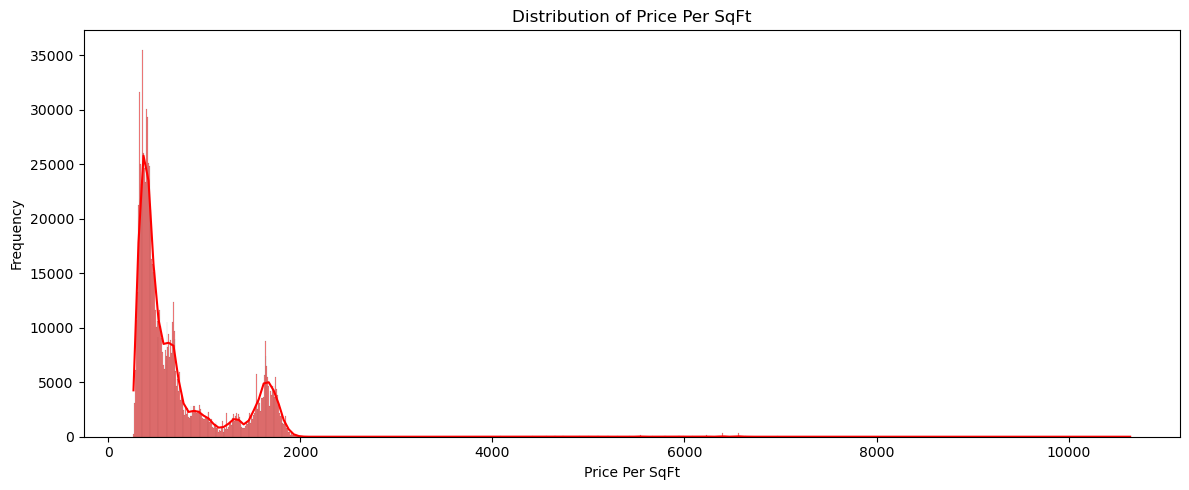

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the updated DataFrame
df = pd.read_csv('updated_complaints_data.csv')

# Histograms for property-related metrics
plt.figure(figsize=(12, 5))
sns.histplot(df['Average_Price_Per_SqFt'], kde=True, color='red')
plt.title('Distribution of Price Per SqFt')
plt.xlabel('Price Per SqFt')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [23]:

# Some rows will have NaN value because there was not property data within its raduis
nan_count = complaints_df['Average_Price_Per_SqFt'].isna().sum()
print("Number of NaN values in 'Average_Price_Per_SqFt':", nan_count)


# Remove rows where 'Average_Price_Per_SqFt' is NaN
complaints_df = complaints_df.dropna(subset=['Average_Price_Per_SqFt'])

# Save the cleaned data back to CSV if needed
complaints_df.to_csv('training_data.csv', index=False)

Number of NaN values in 'Average_Price_Per_SqFt': 117
